#Step 1: Sample

In [1]:
# Manually upload the file using Colab's file upload feature
from google.colab import files

uploaded = files.upload()

# This will prompt you to upload the 'creditcard.csv' file from your local machine

Saving creditcard.csv to creditcard.csv


In [2]:
# Load the dataset into a DataFrame
import pandas as pd

df = pd.read_csv('creditcard.csv') # ensure the file is named 'creditcard.csv'
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#Step 2: Explore

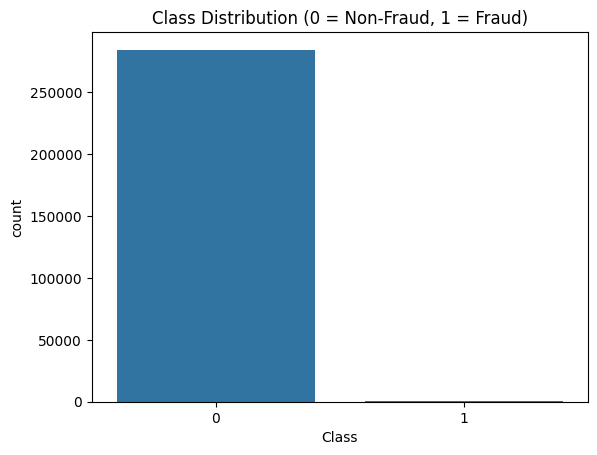

Non-Fraud Cases: 284315
Fraud Cases: 492


In [3]:
# Exploratory Data Analysis (EDA): Check the class distribution (fraud vs non-fraud cases)
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for fraud (1) and non-fraud (0) cases
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.show()

# Print the count of each class
non_fraud = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]
print(f"Non-Fraud Cases: {len(non_fraud)}")
print(f"Fraud Cases: {len(fraud)}")


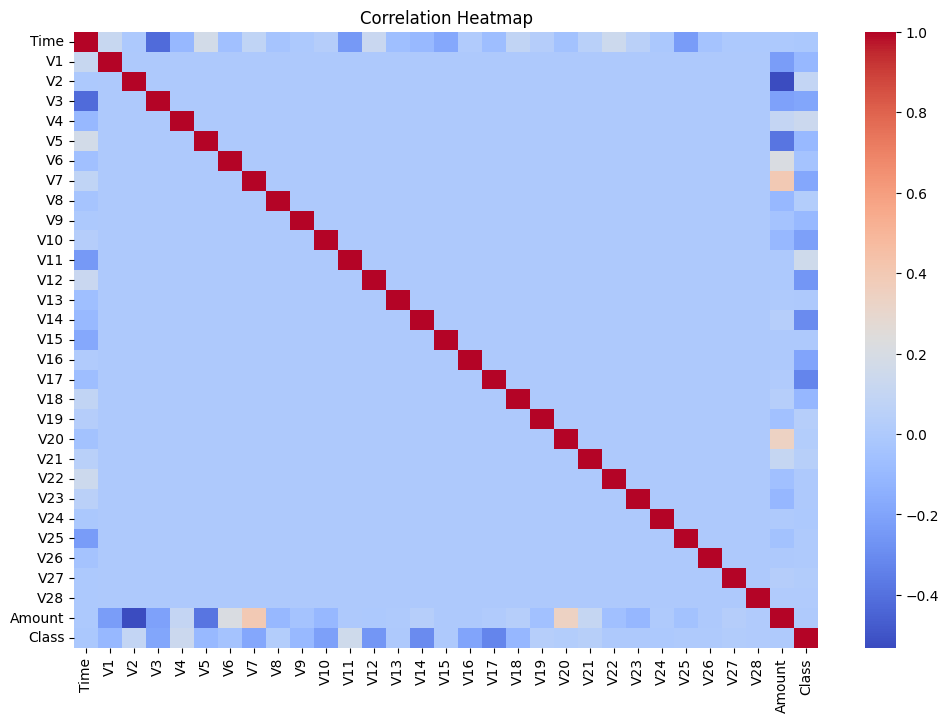

In [4]:
# Descriptive statistics for numerical features
df.describe()

# Correlation heatmap to understand relationships between variables
import seaborn as sns
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


#Step 3: Modify
# Feature Scaling and Preprocessing

In [5]:
# Feature Scaling and Preprocessing
# Standardize the 'Amount' and 'Time' columns for better performance
from sklearn.preprocessing import StandardScaler

# Scaling the 'Amount' and 'Time' columns
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))

# Display the scaled dataset
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [6]:
# Splitting the dataset into features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Splitting into training and testing sets (80-20 split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing data
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (227845, 30)
Testing data shape: (56962, 30)


#Step 4: Model


In [7]:
# Import the RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForest classifier
clf = RandomForestClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Output: Model training complete
print("Model training complete.")


Model training complete.


#Step 5: Assess

Model Evaluation - Classification Report and Confusion Matrix

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



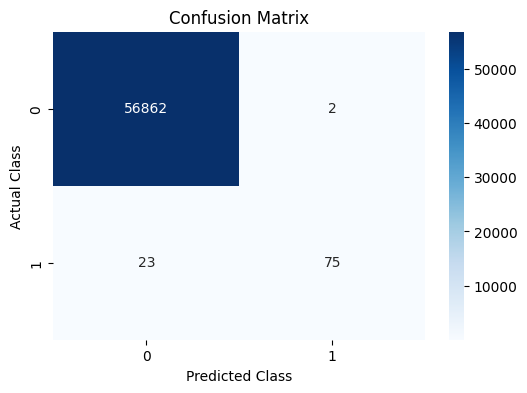

In [8]:
# Import necessary libraries for evaluation
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


ROC Curve and AUC

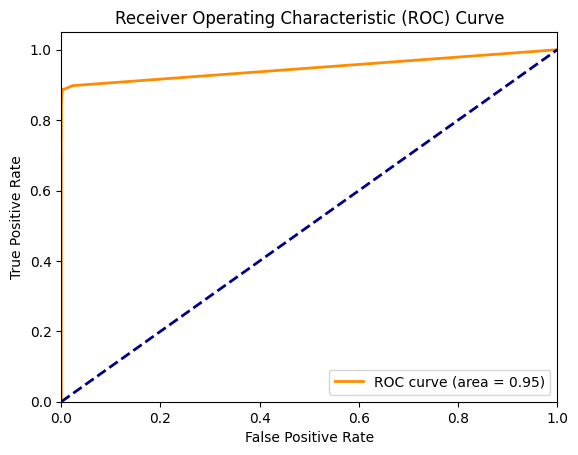

AUC Score: 0.9476107691247575


In [9]:
# Import libraries for ROC and AUC metrics
from sklearn.metrics import roc_curve, auc

# Get probability predictions for the ROC curve
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {roc_auc}")


#Deployment: Save the Model

In [10]:
# Save the trained model using pickle
import pickle

# Save the trained RandomForest classifier model
with open('fraud_detection_model.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)

print("Model saved successfully as 'fraud_detection_model.pkl'.")


Model saved successfully as 'fraud_detection_model.pkl'.
